In [33]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize': (20,10)})

In [34]:
data = pd.read_csv('movies.csv')
data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


Selecting only the required columns

In [35]:
cols = ['name', 'rating', 'genre', 'year', 'score', 'votes', 'director', 'star', 'country','gross', 'company', 'runtime']
df = data[cols]
df.isnull().sum()

name          0
rating       77
genre         0
year          0
score         3
votes         3
director      0
star          1
country       3
gross       189
company      17
runtime       4
dtype: int64

Visualising heatmap of null values

<AxesSubplot:>

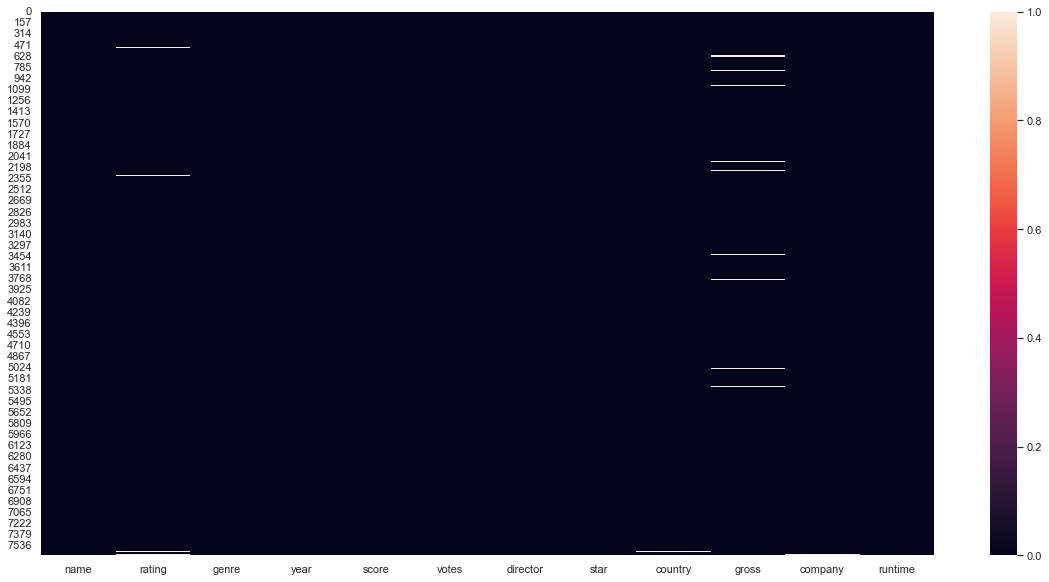

In [36]:
sns.heatmap(df.isnull())

In [37]:
# Drop the missing values
df = df.dropna()

In [38]:
# Check for duplicate data
df.duplicated().any()

False

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7415 entries, 0 to 7659
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7415 non-null   object 
 1   rating    7415 non-null   object 
 2   genre     7415 non-null   object 
 3   year      7415 non-null   int64  
 4   score     7415 non-null   float64
 5   votes     7415 non-null   float64
 6   director  7415 non-null   object 
 7   star      7415 non-null   object 
 8   country   7415 non-null   object 
 9   gross     7415 non-null   float64
 10  company   7415 non-null   object 
 11  runtime   7415 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 753.1+ KB


In [40]:
df.describe(include='all')

,name,rating,genre,year,score,votes,director,star,country,gross,company,runtime
count,7415,7415,7415,7415.000000,7415.000000,7.415000e+03,7415,7415,7415,7.415000e+03,7415,7415.000000
unique,7270,12,18,NaN,NaN,NaN,2817,2653,57,NaN,2245,NaN
top,Anna,R,Comedy,NaN,NaN,NaN,Woody Allen,Nicolas Cage,United States,NaN,Universal Pictures,NaN
freq,3,3608,2183,NaN,NaN,NaN,38,43,5358,NaN,376,NaN
mean,NaN,NaN,NaN,2000.643156,6.397020,9.073011e+04,NaN,NaN,NaN,7.899458e+07,NaN,107.445314
std,NaN,NaN,NaN,11.030024,0.962995,1.653217e+05,NaN,NaN,NaN,1.661982e+08,NaN,18.514693
min,NaN,NaN,NaN,1980.000000,1.900000,1.050000e+02,NaN,NaN,NaN,3.090000e+02,NaN,63.000000
25%,NaN,NaN,NaN,1991.000000,5.800000,1.000000e+04,NaN,NaN,NaN,4.632797e+06,NaN,95.000000
50%,NaN,NaN,NaN,2001.000000,6.500000,3.400000e+04,NaN,NaN,NaN,2.038760e+07,NaN,104.000000
75%,NaN,NaN,NaN,2010.000000,7.100000,9.600000e+04,NaN,NaN,NaN,7.645189e+07,NaN,116.000000


Number of movies per year

In [41]:
df['year'].value_counts()

2009    200
2002    200
2014    200
2013    200
2005    200
2018    199
2006    199
2007    199
2008    199
2011    199
2012    199
2016    199
2017    199
2004    199
2010    198
1994    198
1996    198
2001    197
2003    197
1995    196
1997    196
2015    196
1991    195
1993    195
1998    194
2000    193
1999    193
1988    191
1990    190
1992    189
1989    186
1987    186
1986    182
2019    180
1985    177
1984    155
1983    127
1982    118
1981    103
1980     80
2020     14
Name: year, dtype: int64

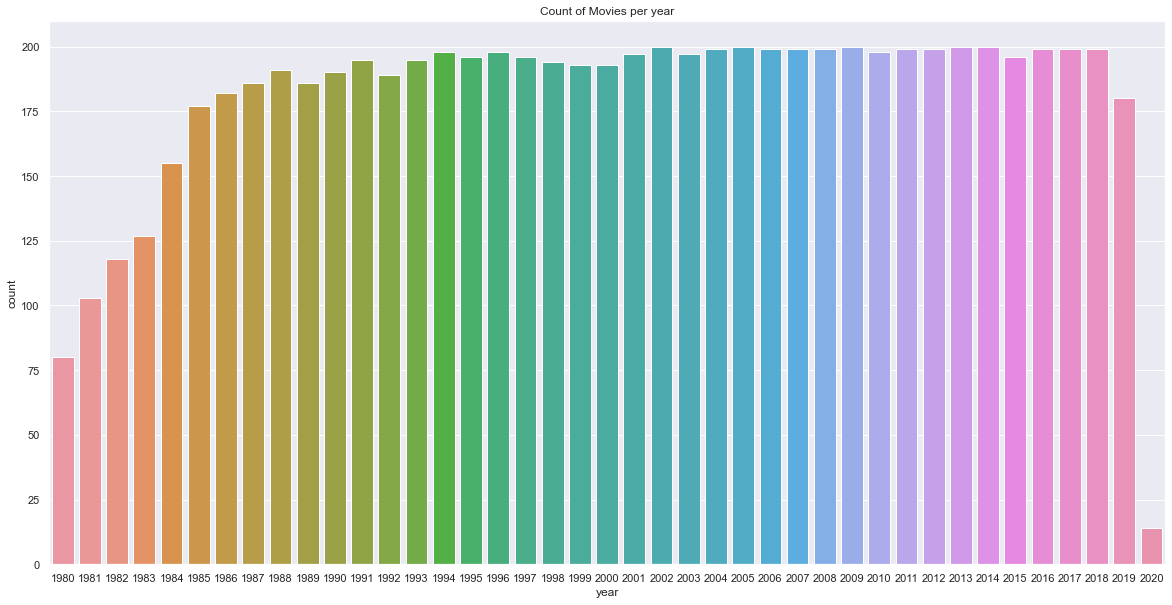

In [42]:
sns.countplot(data=df, x='year')
plt.title('Count of Movies per year')
plt.show()

<AxesSubplot:>

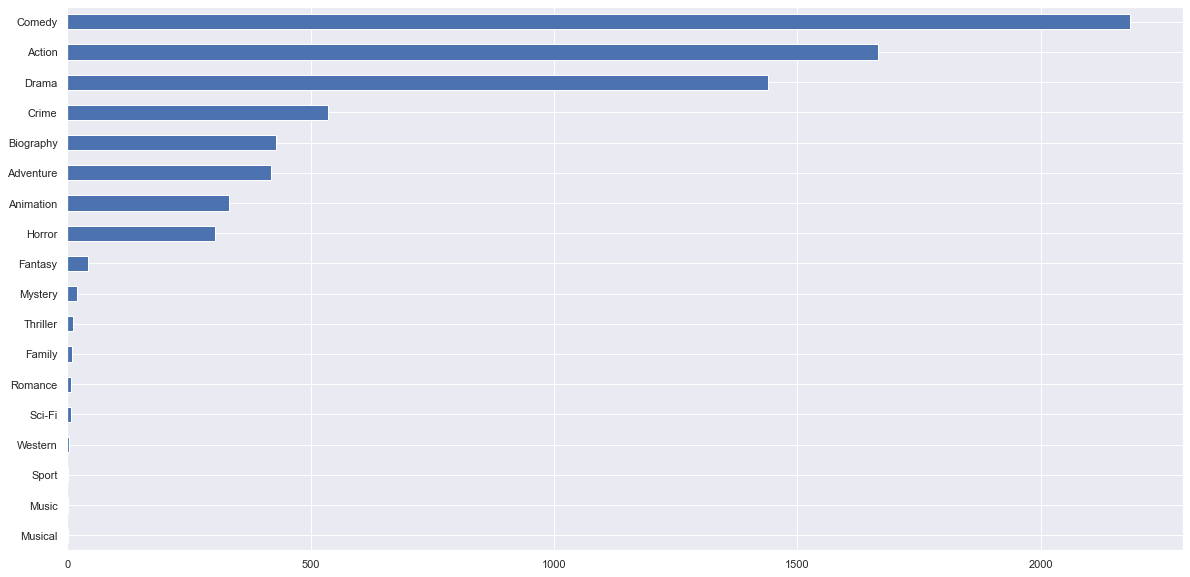

In [43]:
df['genre'].value_counts().sort_values().plot(kind='barh')

Finding total number of Comedy genre movies

In [44]:
df.loc[df['genre']=='Comedy', 'genre'].count()

2183

Get count of every genre

In [45]:
Counter(df['genre'])

Counter({'Drama': 1440,
         'Adventure': 419,
         'Action': 1666,
         'Comedy': 2183,
         'Horror': 304,
         'Biography': 429,
         'Crime': 536,
         'Fantasy': 42,
         'Family': 10,
         'Animation': 332,
         'Romance': 8,
         'Music': 1,
         'Western': 3,
         'Thriller': 12,
         'Sci-Fi': 8,
         'Mystery': 20,
         'Sport': 1,
         'Musical': 1})

Finding the average gross earning per year

In [46]:
df.groupby('year')['gross'].mean().sort_values(ascending=False)

year
2020    2.016057e+08
2019    1.636007e+08
2016    1.454171e+08
2017    1.431359e+08
2018    1.411273e+08
2015    1.362571e+08
2014    1.324574e+08
2013    1.299792e+08
2012    1.278297e+08
2011    1.248125e+08
2010    1.167000e+08
2009    1.166934e+08
2008    1.090561e+08
2007    1.024274e+08
2004    9.406022e+07
2006    9.373905e+07
2003    8.948464e+07
2005    8.933305e+07
2002    8.501718e+07
2001    7.903312e+07
2000    6.963085e+07
1999    6.914834e+07
1997    6.689095e+07
1998    5.760837e+07
1996    4.959191e+07
1995    4.820076e+07
1994    4.577235e+07
1993    4.122036e+07
1992    3.879663e+07
1990    3.580382e+07
1989    3.269117e+07
1991    3.190335e+07
1980    3.104447e+07
1982    2.701336e+07
1988    2.534233e+07
1981    2.435512e+07
1984    2.272042e+07
1987    2.167255e+07
1983    2.160977e+07
1985    2.085598e+07
1986    2.001911e+07
Name: gross, dtype: float64

We can see that highest average gross earnings was in 2020

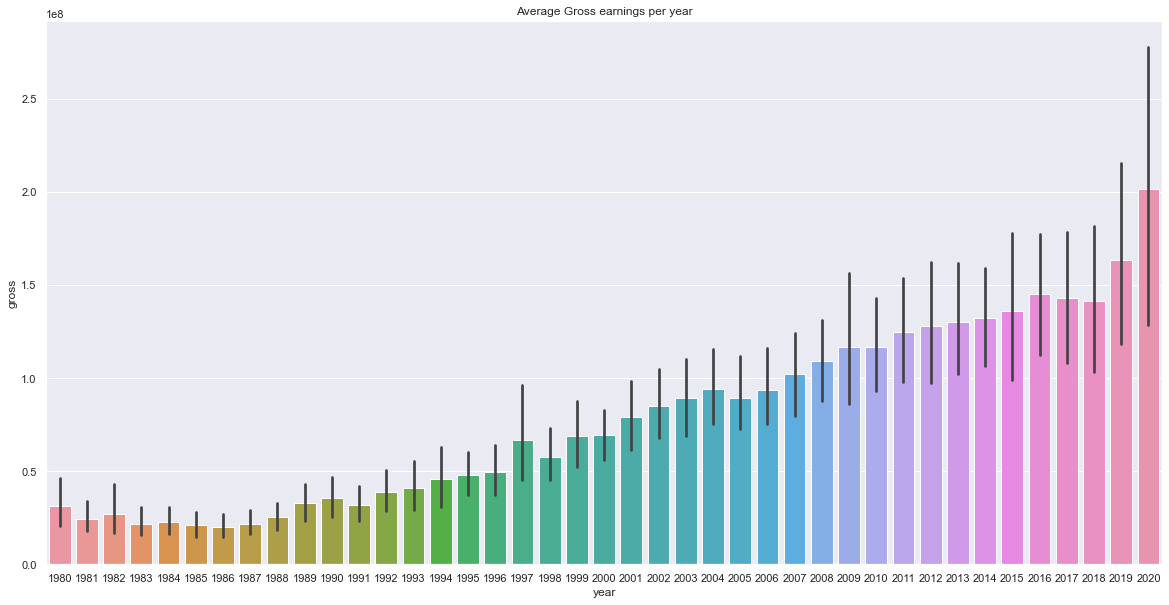

In [47]:
sns.barplot(data=df, x='year', y='gross')
plt.title('Average Gross earnings per year')
plt.show()

Get the top 10 rated movies

In [48]:
top10_rated = df.nlargest(10, 'score')[['name', 'genre', 'score', 'director']]
top10_rated

,name,genre,score,director
2443,The Shawshank Redemption,Drama,9.3,Frank Darabont
5243,The Dark Knight,Action,9.0,Christopher Nolan
2247,Schindler's List,Biography,8.9,Steven Spielberg
2444,Pulp Fiction,Crime,8.9,Quentin Tarantino
4245,The Lord of the Rings: The Return of the King,Action,8.9,Peter Jackson
2445,Forrest Gump,Drama,8.8,Robert Zemeckis
3444,Fight Club,Drama,8.8,David Fincher
3845,The Lord of the Rings: The Fellowship of the Ring,Action,8.8,Peter Jackson
5643,Inception,Action,8.8,Christopher Nolan
2,Star Wars: Episode V - The Empire Strikes Back,Action,8.7,Irvin Kershner


<AxesSubplot:xlabel='score', ylabel='name'>

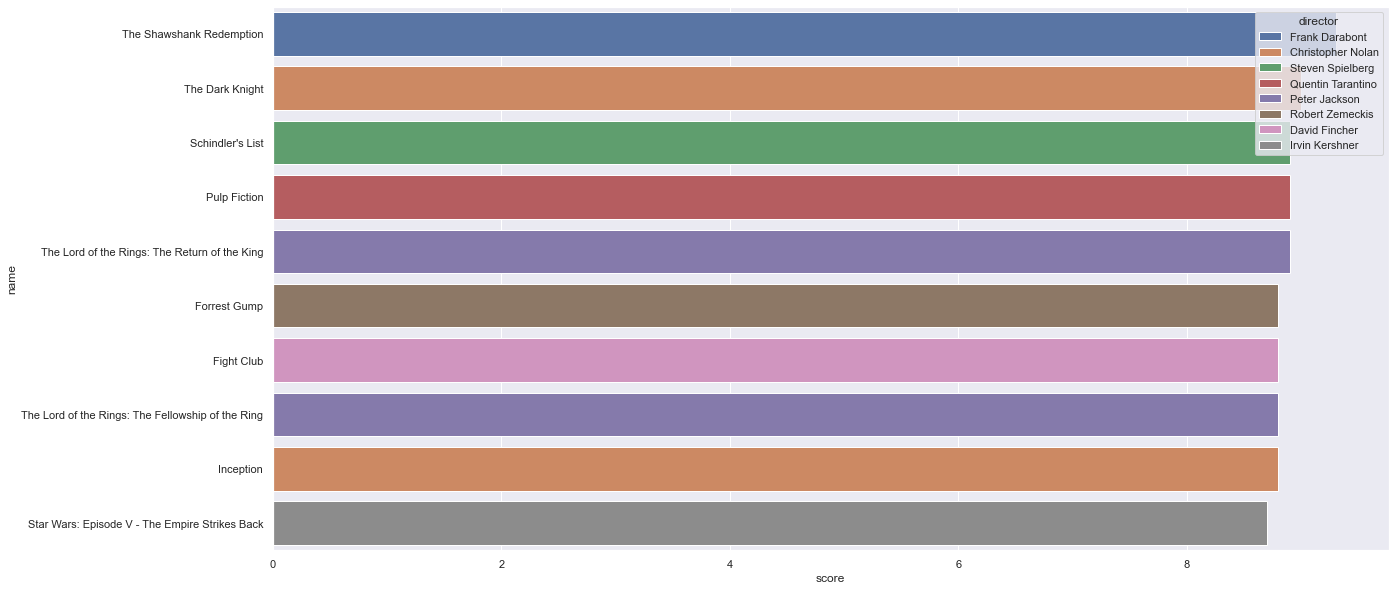

In [49]:
sns.barplot(data=top10_rated, x='score', y='name', hue='director', dodge=False)

Finding the top 10 gross earnings

In [50]:
top10_gross = df.nlargest(10, 'gross')[['name', 'genre', 'gross', 'score', 'director']]
top10_gross

,name,genre,gross,score,director
5445,Avatar,Action,2.847246e+09,7.8,James Cameron
7445,Avengers: Endgame,Action,2.797501e+09,8.4,Anthony Russo
3045,Titanic,Drama,2.201647e+09,7.8,James Cameron
6663,Star Wars: Episode VII - The Force Awakens,Action,2.069522e+09,7.8,J.J. Abrams
7244,Avengers: Infinity War,Action,2.048360e+09,8.4,Anthony Russo
7480,The Lion King,Animation,1.670728e+09,6.9,Jon Favreau
6653,Jurassic World,Action,1.670516e+09,7.0,Colin Trevorrow
6043,The Avengers,Action,1.518816e+09,8.0,Joss Whedon
6646,Furious 7,Action,1.515341e+09,7.1,James Wan
7494,Frozen II,Animation,1.450027e+09,6.8,Chris Buck


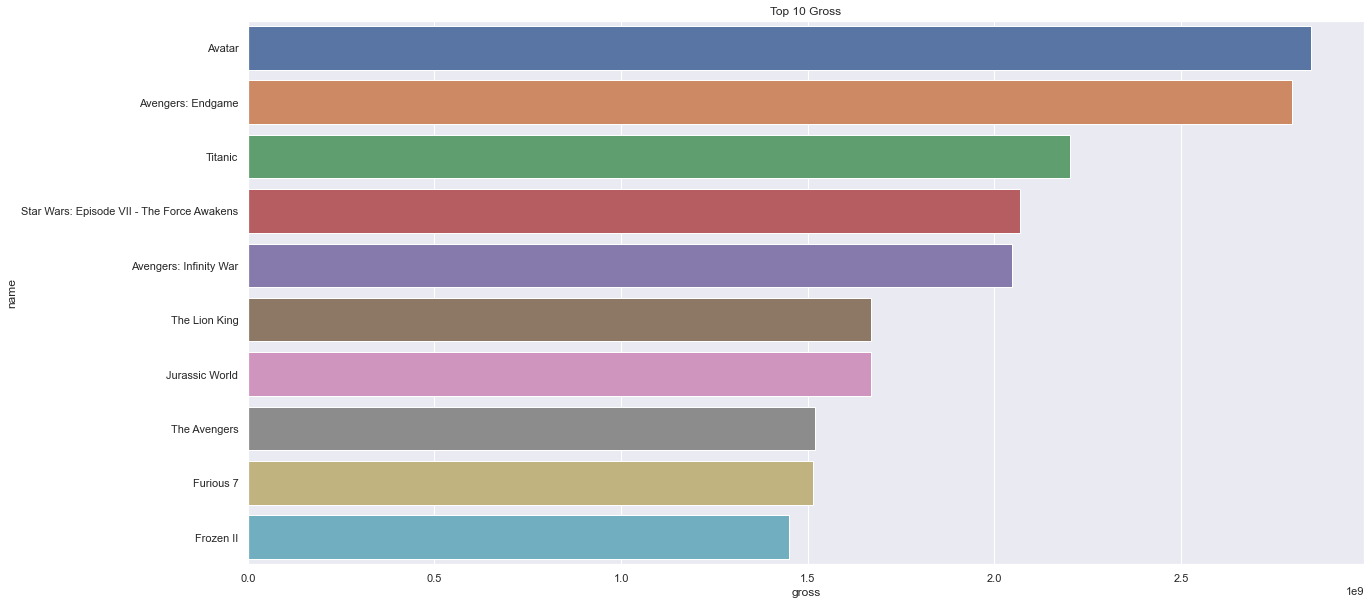

In [51]:
sns.barplot(data=top10_gross, x='gross', y='name', dodge=False)
plt.title('Top 10 Gross')
plt.show()

Finding average rating of movies per year

In [52]:
df.groupby('year')['score'].mean().sort_values(ascending=False)

year
2016    6.630653
2013    6.619000
2014    6.590000
2017    6.557286
2015    6.512755
2004    6.510553
1999    6.491192
2018    6.482915
2011    6.481407
2012    6.478894
2007    6.472864
2010    6.465657
2006    6.463819
1995    6.453061
1998    6.447938
2009    6.444500
2001    6.440102
1992    6.409524
1991    6.395897
1993    6.388205
2008    6.383417
2019    6.380000
2005    6.363000
2002    6.359000
1985    6.357627
2000    6.339896
1981    6.332039
2003    6.327919
1997    6.327551
1990    6.318421
1994    6.313636
1982    6.312712
1980    6.292500
1988    6.286387
1987    6.242473
1996    6.237374
1989    6.211828
1986    6.185165
1984    6.174839
2020    6.150000
1983    6.066142
Name: score, dtype: float64

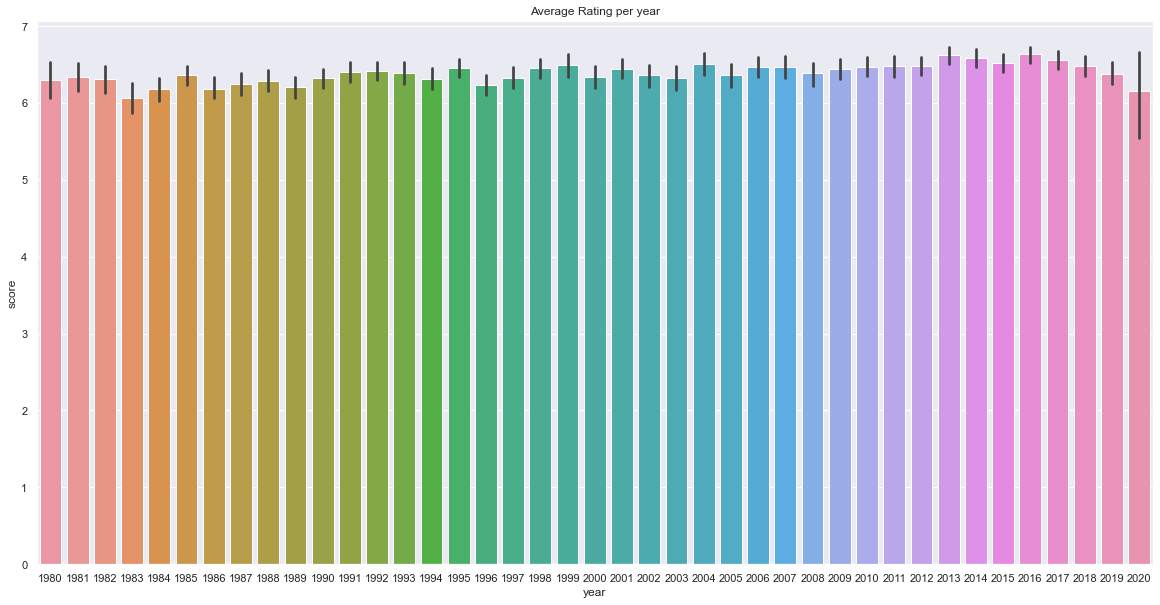

In [53]:
sns.barplot(data=df, x='year', y='score')
plt.title('Average Rating per year')
plt.show()

Finding Gross earning and rating relation if any

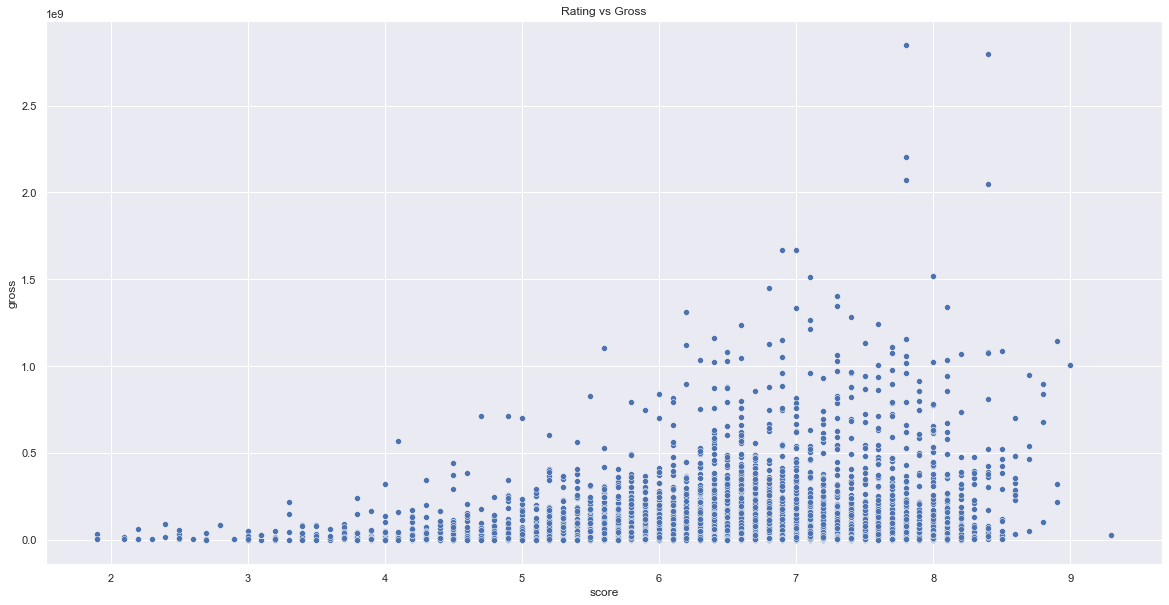

In [54]:
sns.scatterplot(data=df, x='score', y='gross')
plt.title('Rating vs Gross')
plt.show()

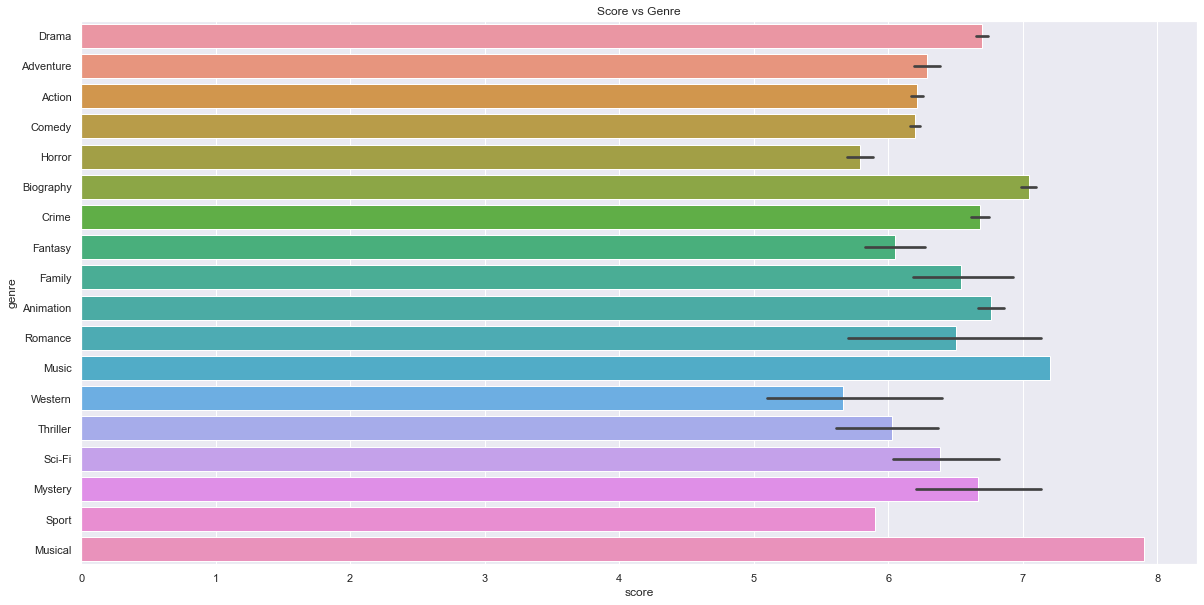

In [55]:
sns.barplot(data=df, x='score', y='genre')
plt.title('Score vs Genre')
plt.show()

Although there are very few musical genre, but the rating is quite good as compared to comedy genre